<a href="https://colab.research.google.com/github/JBattana/115-Assignments-OnCampus-/blob/main/Week10_Assignment_10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Use the heart attacks dataset to perform logistic regression and predict the values and evaluate the accuracy in which your model has performed.**

Load the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler  # Optional, for scaling if needed
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset as a Pandas dataframe

In [5]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv("heartattack_data.csv")

# Display the first few rows to verify
print("First 5 rows of the DataFrame:")
print(df.head())

First 5 rows of the DataFrame:
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0  

Perform Exploratory Data Analysis. You can visualize any features at this point. (Use Groupby/ summary statistics etc)

Shape of the dataset: (4238, 16)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), 

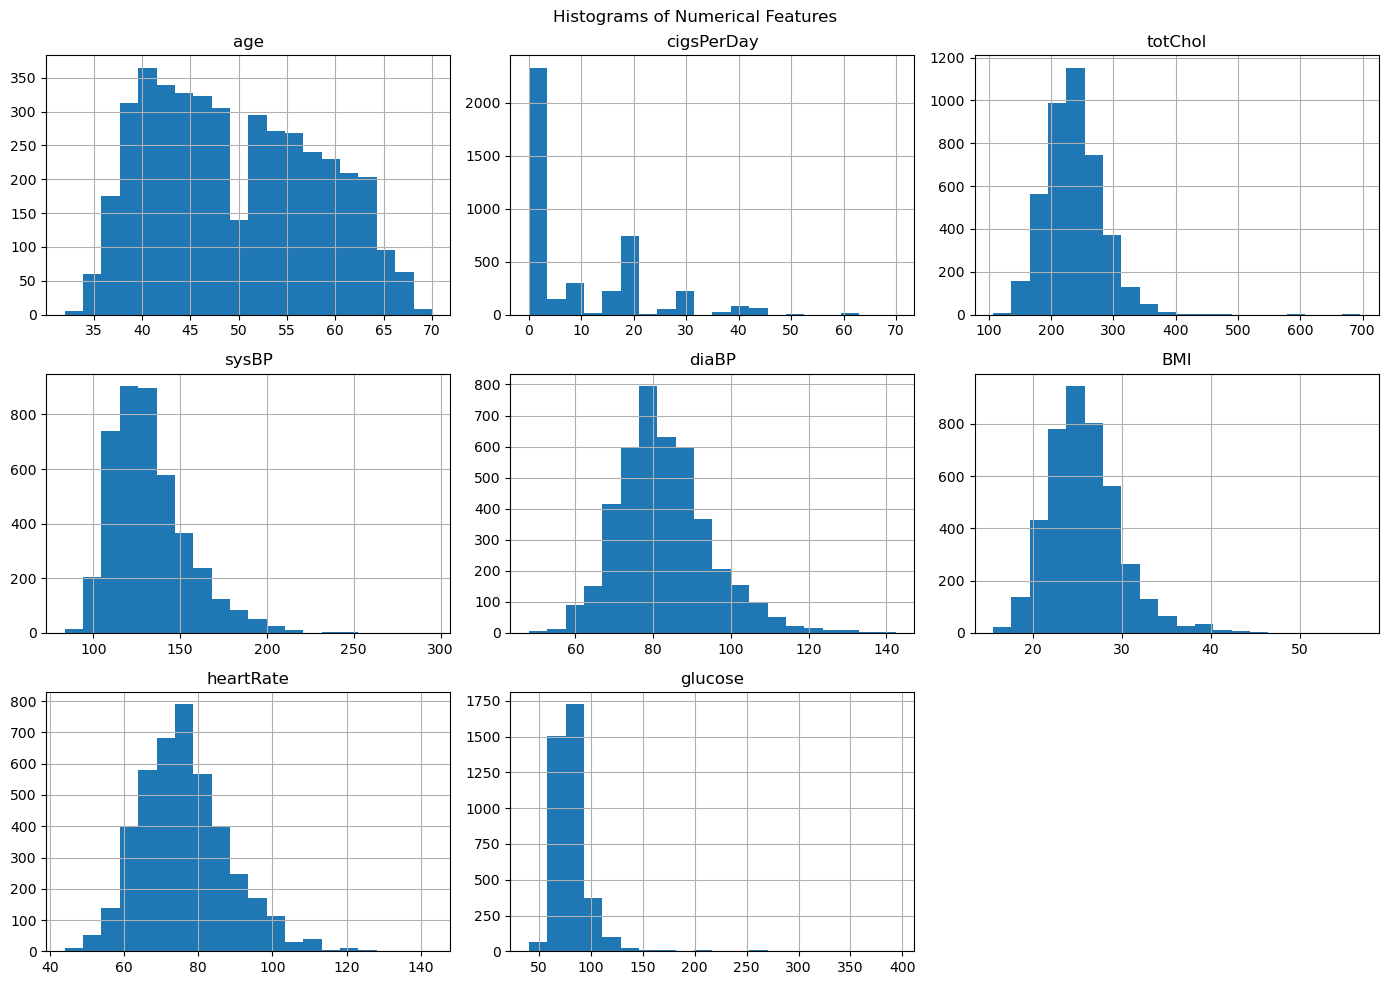

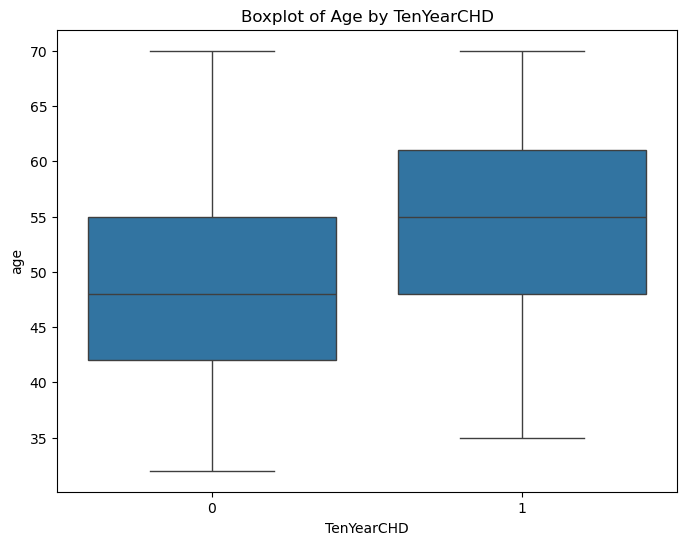

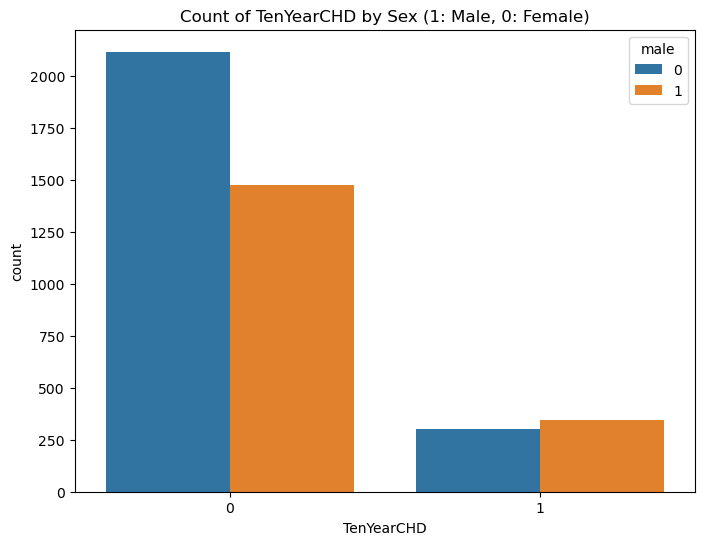

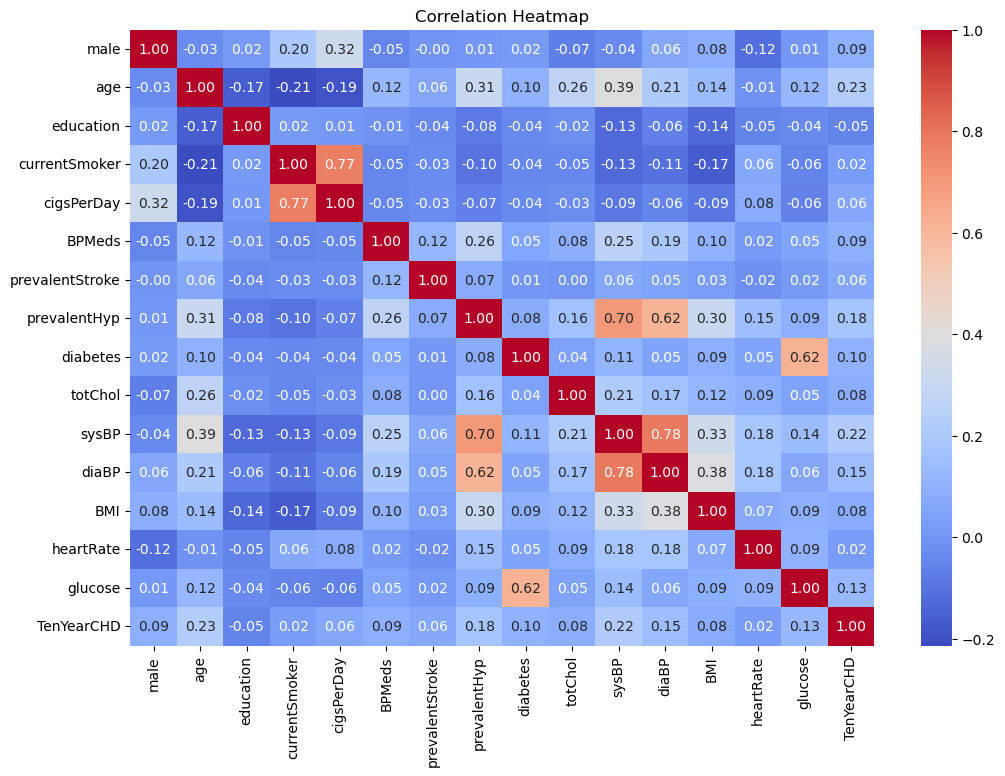

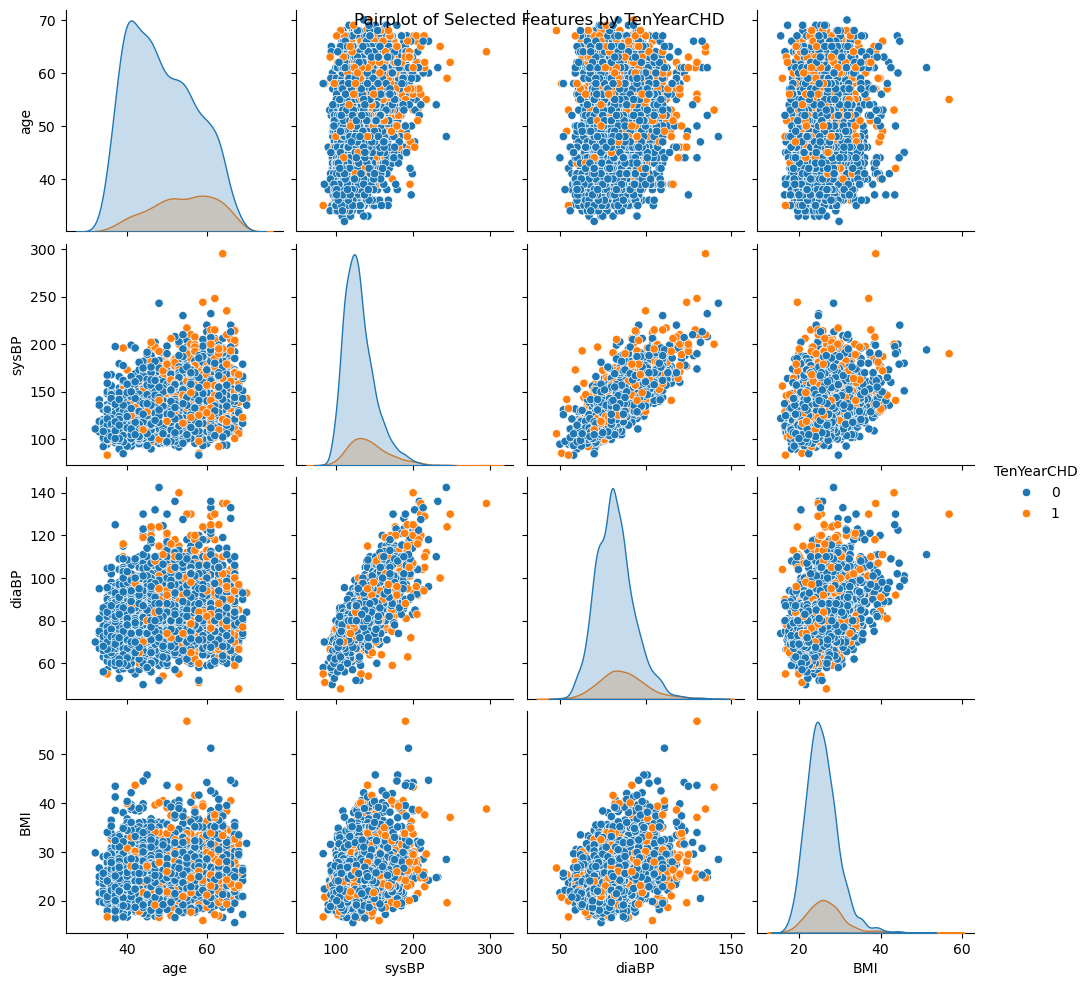

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'NA' strings with actual NaN values for proper handling
df.replace('NA', np.nan, inplace=True)

# 1. Shape of the dataset
print("Shape of the dataset:", df.shape)

# 2. Data types and non-null counts
print("\nData Info:")
df.info()

# 3. Missing values count
print("\nMissing Values:\n", df.isnull().sum())

# 4. Unique values for categorical columns
categorical_cols = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
print("\nUnique Values in Categorical Columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

# 5. Summary statistics for numerical columns
print("\nSummary Statistics:\n", df.describe())

# 6. Groupby analysis: Mean values grouped by target 'TenYearCHD'
print("\nGroupby TenYearCHD (Mean Values):\n", df.groupby('TenYearCHD').mean())

# 7. Visualizations

# Histogram for numerical features
numerical_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
df[numerical_cols].hist(bins=20, figsize=(14, 10), layout=(3, 3))
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout()
plt.show()

# Boxplot: Age by TenYearCHD
plt.figure(figsize=(8, 6))
sns.boxplot(x='TenYearCHD', y='age', data=df)
plt.title("Boxplot of Age by TenYearCHD")
plt.show()

# Bar plot: Count of TenYearCHD by sex (male)
plt.figure(figsize=(8, 6))
sns.countplot(x='TenYearCHD', hue='male', data=df)
plt.title("Count of TenYearCHD by Sex (1: Male, 0: Female)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot for selected features vs target (sample for visualization)
sns.pairplot(df[['age', 'sysBP', 'diaBP', 'BMI', 'TenYearCHD']], hue='TenYearCHD')
plt.suptitle("Pairplot of Selected Features by TenYearCHD")
plt.show()

Clean the data where necessary - null values, data types, change in feature names. Save the clean data as a new data frame for further analysis

In [9]:
import pandas as pd
import numpy as np

# Load the dataset (assuming it's in the working directory)
df = pd.read_csv("heartattack_data.csv")

# Replace 'NA' strings with np.nan (if not already done)
df.replace('NA', np.nan, inplace=True)

# 1. Handle missing values
# Check missing values
missing_values = df.isnull().sum()
print("Missing Values Before Cleaning:\n", missing_values)

# Strategy: Impute numerical columns with median, categorical with mode
numerical_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
categorical_cols = ['education', 'BPMeds']

# Impute numerical columns with median
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Impute categorical columns with mode
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify no missing values remain
print("\nMissing Values After Imputation:\n", df.isnull().sum())

# 2. Ensure correct data types
# Define expected data types
expected_dtypes = {
    'male': 'int64',
    'age': 'int64',
    'education': 'float64',  # Keeping as float due to original data format
    'currentSmoker': 'int64',
    'cigsPerDay': 'float64',  # Float to handle decimals
    'BPMeds': 'float64',      # Float due to original data
    'prevalentStroke': 'int64',
    'prevalentHyp': 'int64',
    'diabetes': 'int64',
    'totChol': 'float64',
    'sysBP': 'float64',
    'diaBP': 'float64',
    'BMI': 'float64',
    'heartRate': 'float64',
    'glucose': 'float64',
    'TenYearCHD': 'int64'
}

# Convert data types
for col, dtype in expected_dtypes.items():
    df[col] = df[col].astype(dtype)

# Verify data types
print("\nData Types After Conversion:\n", df.dtypes)

# 3. Rename columns for clarity
# Create a dictionary for renaming
rename_dict = {
    'male': 'sex',
    'totChol': 'total_cholesterol',
    'sysBP': 'systolic_bp',
    'diaBP': 'diastolic_bp',
    'BMI': 'body_mass_index',
    'TenYearCHD': 'heart_disease_risk'
}

# Rename columns
df.rename(columns=rename_dict, inplace=True)

# 4. Create a new DataFrame for cleaned data
clean_df = df.copy()

# Display first few rows of cleaned DataFrame
print("\nFirst 5 Rows of Cleaned DataFrame:\n", clean_df.head())

# Save the cleaned DataFrame to a new CSV file for further analysis
clean_df.to_csv("clean_heartattack_data.csv", index=False)
print("\nCleaned data saved to 'clean_heartattack_data.csv'")

Missing Values Before Cleaning:
 male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Missing Values After Imputation:
 male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Data Types After Conversion:
 male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalent

/var/folders/3p/5b3psdks6jb2964qg1fpw1nc0000gn/T/ipykernel_9895/749331723.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/var/folders/3p/5b3psdks6jb2964qg1fpw1nc0000gn/T/ipykernel_9895/749331723.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

Apply Logistic Regression model and fit the data  

(If needed, you will have to transform categorical data into dummy variables)


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# Load the cleaned dataset
clean_df = pd.read_csv("clean_heartattack_data.csv")

# 1. Prepare features and target
# Define features (all columns except the target)
features = [col for col in clean_df.columns if col != 'heart_disease_risk']
X = clean_df[features]
y = clean_df['heart_disease_risk']

# 2. Convert 'education' to dummy variables (treating it as categorical)
X = pd.get_dummies(X, columns=['education'], drop_first=True)

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Scale numerical features
scaler = StandardScaler()
# List of numerical columns (excluding binary/categorical and dummy variables)
numerical_cols = ['age', 'cigsPerDay', 'total_cholesterol', 'systolic_bp', 'diastolic_bp', 
                  'body_mass_index', 'heartRate', 'glucose']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# 5. Initialize and fit the logistic regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

# 6. Predict on training and testing sets
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# Print confirmation of model fitting
print("Logistic Regression model fitted successfully.")
print("\nFeature Coefficients:")
for feature, coef in zip(X_train.columns, logreg.coef_[0]):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {logreg.intercept_[0]:.4f}")

# Save the predictions for further analysis
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})
results.to_csv("logistic_regression_predictions.csv", index=False)
print("\nPredictions saved to 'logistic_regression_predictions.csv'")

Logistic Regression model fitted successfully.

Feature Coefficients:
sex: 0.4012
age: 0.5633
currentSmoker: -0.0340
cigsPerDay: 0.2885
BPMeds: 0.2502
prevalentStroke: 0.7667
prevalentHyp: 0.1946
diabetes: 0.0170
total_cholesterol: 0.0415
systolic_bp: 0.3094
diastolic_bp: 0.0194
body_mass_index: -0.0253
heartRate: -0.0611
glucose: 0.1856
education_2.0: -0.1379
education_3.0: -0.0140
education_4.0: 0.1869
Intercept: -2.1770

Predictions saved to 'logistic_regression_predictions.csv'


Show performance metrics - Determining the Accuracy on which the model has performed ROC, AUC

Accuracy: 0.8585

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.62      0.08      0.14       124

    accuracy                           0.86       848
   macro avg       0.74      0.54      0.53       848
weighted avg       0.83      0.86      0.81       848

ROC-AUC Score: 0.7077


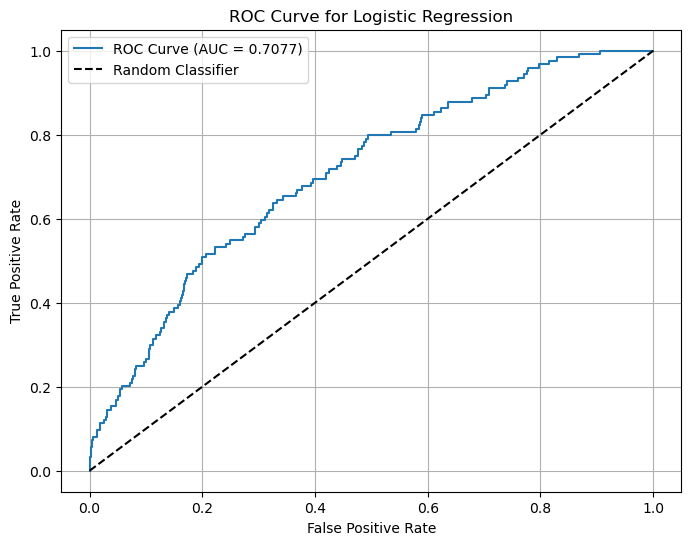

In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the cleaned dataset
clean_df = pd.read_csv("clean_heartattack_data.csv")

# Prepare features and target
features = [col for col in clean_df.columns if col != 'heart_disease_risk']
X = clean_df[features]
y = clean_df['heart_disease_risk']

# Convert 'education' to dummy variables
X = pd.get_dummies(X, columns=['education'], drop_first=True)

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['age', 'cigsPerDay', 'total_cholesterol', 'systolic_bp', 'diastolic_bp', 
                  'body_mass_index', 'heartRate', 'glucose']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Load or refit the logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

# Get predictions and probabilities
y_test_pred = logreg.predict(X_test)
y_test_prob = logreg.predict_proba(X_test)[:, 1]  # Probability for positive class

# 1. Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy:.4f}")

# 2. Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# 3. ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_test_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# 4. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

Show a correlation matrix between actual values vs predicted values ans explain your insights

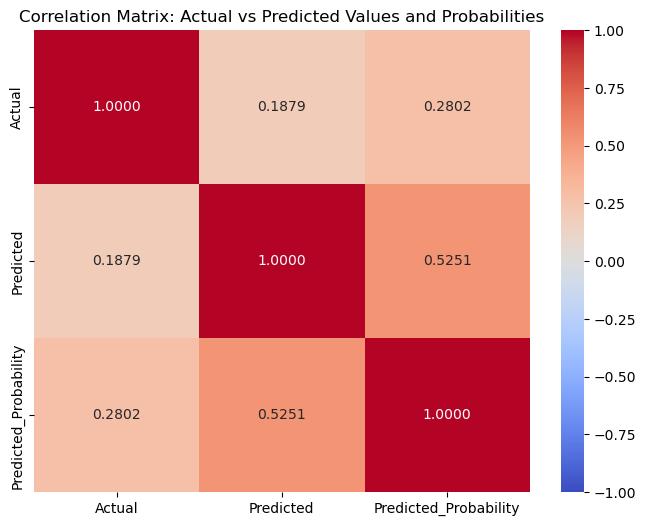


Correlation Matrix:
                          Actual  Predicted  Predicted_Probability
Actual                 1.000000   0.187908               0.280204
Predicted              0.187908   1.000000               0.525084
Predicted_Probability  0.280204   0.525084               1.000000


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load the cleaned dataset
clean_df = pd.read_csv("clean_heartattack_data.csv")

# Prepare features and target
features = [col for col in clean_df.columns if col != 'heart_disease_risk']
X = clean_df[features]
y = clean_df['heart_disease_risk']

# Convert 'education' to dummy variables
X = pd.get_dummies(X, columns=['education'], drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['age', 'cigsPerDay', 'total_cholesterol', 'systolic_bp', 'diastolic_bp', 
                  'body_mass_index', 'heartRate', 'glucose']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Refit the logistic regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

# Get predictions and probabilities
y_test_pred = logreg.predict(X_test)
y_test_prob = logreg.predict_proba(X_test)[:, 1]  # Probability for positive class

# Create a DataFrame for actual values, predicted values, and predicted probabilities
correlation_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred,
    'Predicted_Probability': y_test_prob
})

# Compute the correlation matrix
corr_matrix = correlation_df.corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".4f", vmin=-1, vmax=1)
plt.title("Correlation Matrix: Actual vs Predicted Values and Probabilities")
plt.show()

# Print the correlation matrix
print("\nCorrelation Matrix:\n", corr_matrix)

You can also use 1 independent feature and the target to show the fit of data in a sigmoid curve through visualization

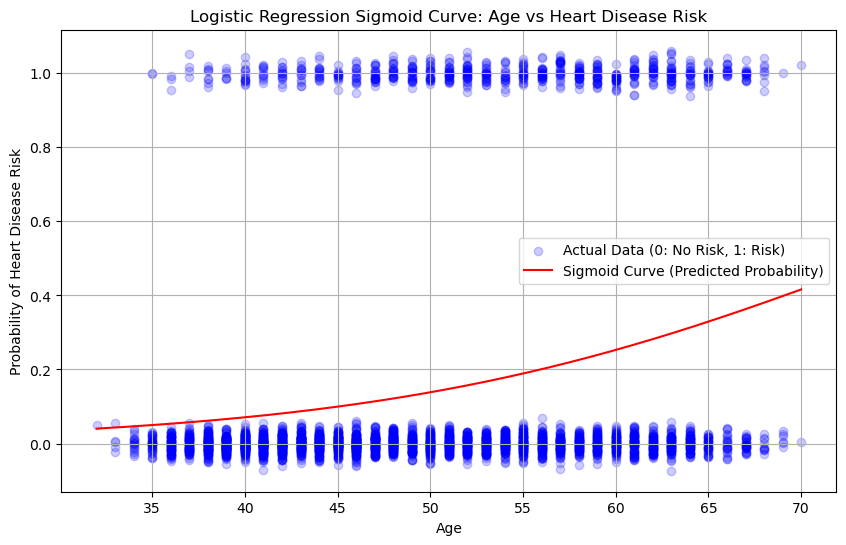

Logistic Regression Coefficient for Age: 0.6381
Intercept: -1.8586


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load the cleaned dataset
clean_df = pd.read_csv("clean_heartattack_data.csv")

# Select one feature ('age') and the target
X = clean_df[['age']]  # Single feature
y = clean_df['heart_disease_risk']

# Scale the feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit logistic regression model with one feature
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_scaled, y)

# Generate points for the sigmoid curve
x_range = np.linspace(X_scaled.min(), X_scaled.max(), 300).reshape(-1, 1)
y_prob = logreg.predict_proba(x_range)[:, 1]  # Probability for positive class

# Inverse transform the scaled x_range to original scale for plotting
x_range_original = scaler.inverse_transform(x_range)

# Plot the sigmoid curve and data points
plt.figure(figsize=(10, 6))
# Scatter plot of actual data points (jitter y for visibility)
plt.scatter(clean_df['age'], y + np.random.normal(0, 0.02, size=y.shape), 
           alpha=0.2, label='Actual Data (0: No Risk, 1: Risk)', color='blue')
# Plot the sigmoid curve
plt.plot(x_range_original, y_prob, color='red', label='Sigmoid Curve (Predicted Probability)')
plt.xlabel('Age')
plt.ylabel('Probability of Heart Disease Risk')
plt.title('Logistic Regression Sigmoid Curve: Age vs Heart Disease Risk')
plt.legend()
plt.grid(True)
plt.show()

# Print model coefficients for interpretation
print(f"Logistic Regression Coefficient for Age: {logreg.coef_[0][0]:.4f}")
print(f"Intercept: {logreg.intercept_[0]:.4f}")

**Note**:

Explain your insights at every step, what you interpret from the visualizations or at the end and conclude the outputs that show up after running your code.

Shape of the dataset: (4238, 16)

Missing Values:
 sex                   0
age                   0
education             0
currentSmoker         0
cigsPerDay            0
BPMeds                0
prevalentStroke       0
prevalentHyp          0
diabetes              0
total_cholesterol     0
systolic_bp           0
diastolic_bp          0
body_mass_index       0
heartRate             0
glucose               0
heart_disease_risk    0
dtype: int64

Summary Statistics:
                sex          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4238.000000    4238.000000  4238.000000   
mean      0.429212    49.584946     1.954696       0.494101     8.941482   
std       0.495022     8.572160     1.018510       0.500024    11.902399   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000  

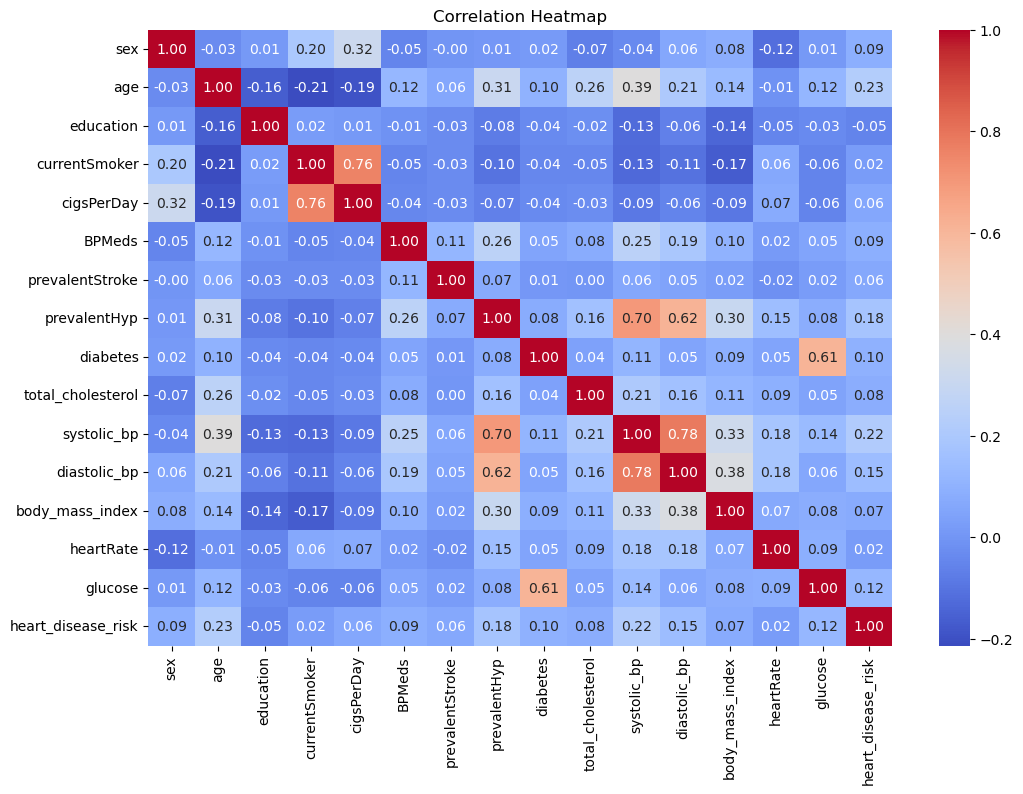


Logistic Regression Coefficients:
sex: 0.4012
age: 0.5633
currentSmoker: -0.0340
cigsPerDay: 0.2885
BPMeds: 0.2502
prevalentStroke: 0.7667
prevalentHyp: 0.1946
diabetes: 0.0170
total_cholesterol: 0.0415
systolic_bp: 0.3094
diastolic_bp: 0.0194
body_mass_index: -0.0253
heartRate: -0.0611
glucose: 0.1856
education_2.0: -0.1379
education_3.0: -0.0140
education_4.0: 0.1869
Intercept: -2.1770

Accuracy: 0.8585

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.62      0.08      0.14       124

    accuracy                           0.86       848
   macro avg       0.74      0.54      0.53       848
weighted avg       0.83      0.86      0.81       848

ROC-AUC Score: 0.7077


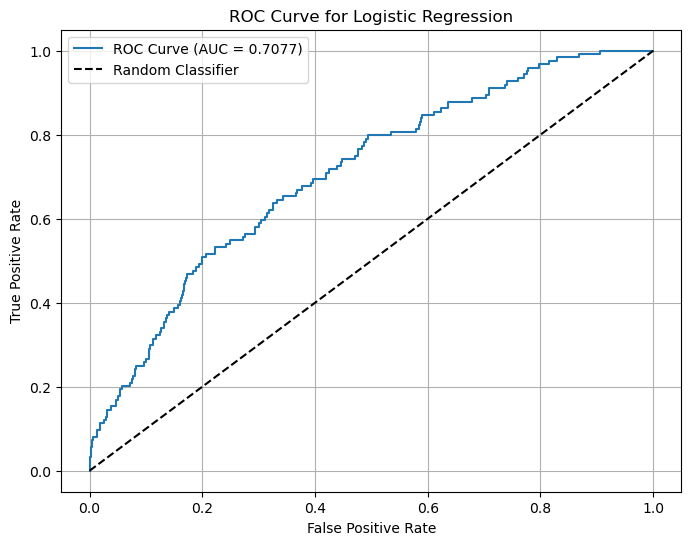

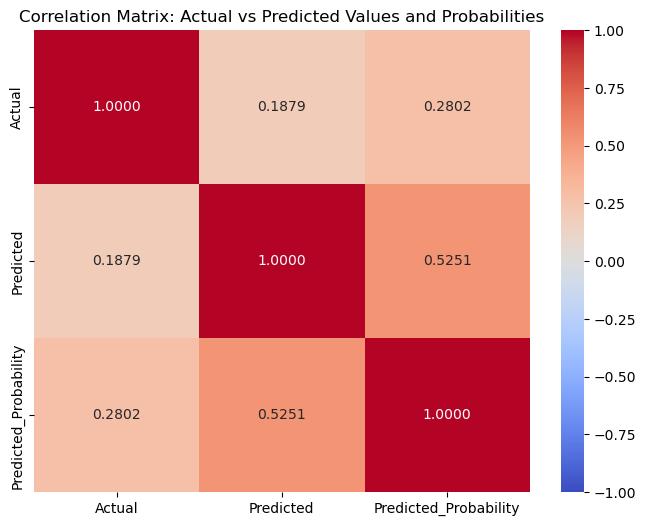


Correlation Matrix:
                          Actual  Predicted  Predicted_Probability
Actual                 1.000000   0.187908               0.280204
Predicted              0.187908   1.000000               0.525084
Predicted_Probability  0.280204   0.525084               1.000000


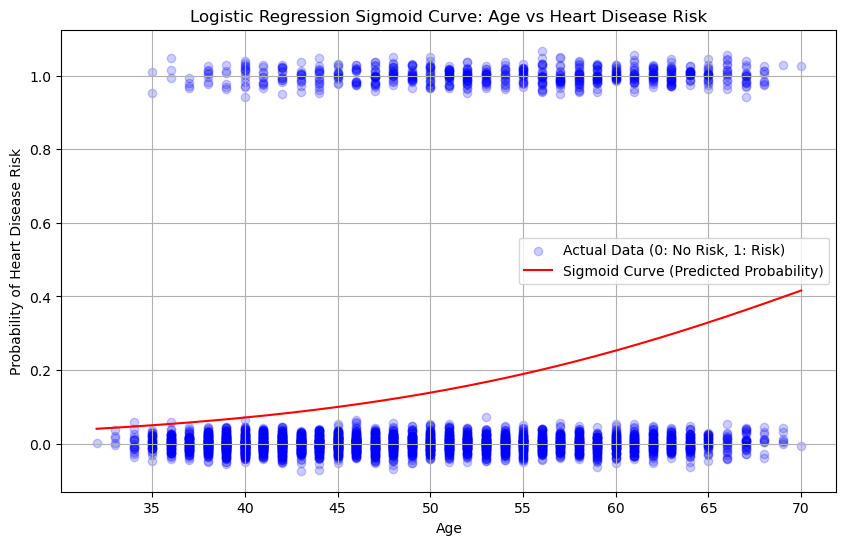


Logistic Regression Coefficient for Age: 0.6381
Intercept: -1.8586


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# Load the dataset
df = pd.read_csv("heartattack_data.csv")
df.replace('NA', np.nan, inplace=True)

# Clean the data
numerical_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
categorical_cols = ['education', 'BPMeds']
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
rename_dict = {
    'male': 'sex', 'totChol': 'total_cholesterol', 'sysBP': 'systolic_bp',
    'diaBP': 'diastolic_bp', 'BMI': 'body_mass_index', 'TenYearCHD': 'heart_disease_risk'
}
df.rename(columns=rename_dict, inplace=True)
expected_dtypes = {
    'sex': 'int64', 'age': 'int64', 'education': 'float64', 'currentSmoker': 'int64',
    'cigsPerDay': 'float64', 'BPMeds': 'float64', 'prevalentStroke': 'int64',
    'prevalentHyp': 'int64', 'diabetes': 'int64', 'total_cholesterol': 'float64',
    'systolic_bp': 'float64', 'diastolic_bp': 'float64', 'body_mass_index': 'float64',
    'heartRate': 'float64', 'glucose': 'float64', 'heart_disease_risk': 'int64'
}
for col, dtype in expected_dtypes.items():
    df[col] = df[col].astype(dtype)
clean_df = df.copy()
clean_df.to_csv("clean_heartattack_data.csv", index=False)

# EDA
print("Shape of the dataset:", clean_df.shape)
print("\nMissing Values:\n", clean_df.isnull().sum())
print("\nSummary Statistics:\n", clean_df.describe())
print("\nGroupby heart_disease_risk (Mean Values):\n", clean_df.groupby('heart_disease_risk').mean())
plt.figure(figsize=(12, 8))
sns.heatmap(clean_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Logistic Regression
features = [col for col in clean_df.columns if col != 'heart_disease_risk']
X = clean_df[features]
y = clean_df['heart_disease_risk']
X = pd.get_dummies(X, columns=['education'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
numerical_cols = ['age', 'cigsPerDay', 'total_cholesterol', 'systolic_bp', 'diastolic_bp', 
                  'body_mass_index', 'heartRate', 'glucose']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)
y_test_pred = logreg.predict(X_test)
y_test_prob = logreg.predict_proba(X_test)[:, 1]
print("\nLogistic Regression Coefficients:")
for feature, coef in zip(X_train.columns, logreg.coef_[0]):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {logreg.intercept_[0]:.4f}")

# Performance Metrics
print(f"\nAccuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
roc_auc = roc_auc_score(y_test, y_test_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

# Correlation Matrix
correlation_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred,
    'Predicted_Probability': y_test_prob
})
corr_matrix = correlation_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".4f", vmin=-1, vmax=1)
plt.title("Correlation Matrix: Actual vs Predicted Values and Probabilities")
plt.show()
print("\nCorrelation Matrix:\n", corr_matrix)

# Sigmoid Curve with 'age'
X_age = clean_df[['age']]
y = clean_df['heart_disease_risk']
scaler_age = StandardScaler()
X_age_scaled = scaler_age.fit_transform(X_age)
logreg_age = LogisticRegression(random_state=42, max_iter=1000)
logreg_age.fit(X_age_scaled, y)
x_range = np.linspace(X_age_scaled.min(), X_age_scaled.max(), 300).reshape(-1, 1)
y_prob_age = logreg_age.predict_proba(x_range)[:, 1]
x_range_original = scaler_age.inverse_transform(x_range)
plt.figure(figsize=(10, 6))
plt.scatter(clean_df['age'], y + np.random.normal(0, 0.02, size=y.shape), 
           alpha=0.2, label='Actual Data (0: No Risk, 1: Risk)', color='blue')
plt.plot(x_range_original, y_prob_age, color='red', label='Sigmoid Curve (Predicted Probability)')
plt.xlabel('Age')
plt.ylabel('Probability of Heart Disease Risk')
plt.title('Logistic Regression Sigmoid Curve: Age vs Heart Disease Risk')
plt.legend()
plt.grid(True)
plt.show()
print(f"\nLogistic Regression Coefficient for Age: {logreg_age.coef_[0][0]:.4f}")
print(f"Intercept: {logreg_age.intercept_[0]:.4f}")